In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
bigmart = pd.read_csv('Train_BM.csv')
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
print(bigmart.shape)

print(bigmart.columns)

print(bigmart.info())

print(bigmart.Item_Weight.isnull().sum())

print(bigmart.Outlet_Size.isnull().sum())

bigmart.describe(include='all')

(8523, 12)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtype

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [71]:
bigmart1 = bigmart.copy()
bigmart1['Outlet_Size'].fillna('Medium',inplace=True)# use inplace= True for permanent change in the dataset
bigmart1['Outlet_Size'].isnull().sum()

0

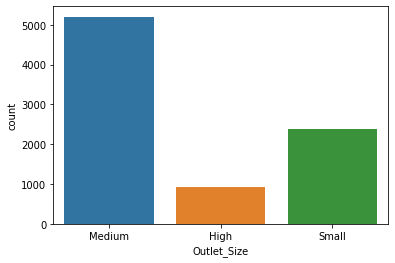

In [72]:
sns.countplot(bigmart1['Outlet_Size'])
plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()
encoded_data1 = bigmart1.copy()
for labels in ['Outlet_Size', 'Outlet_Location_Type','Outlet_Type','Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']:
    encoded_data1[labels] = ls.fit_transform(encoded_data1[labels])
encoded_data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [74]:
from sklearn.preprocessing import Imputer
imput = Imputer(missing_values='NaN',strategy='mean')
imput = imput.fit(encoded_data1.iloc[:, 1:3])
encoded_data1.iloc[:, 1:3] = imput.transform(encoded_data1.iloc[:, 1:3])

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
encoded_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null int32
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null float64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int32
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int32
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null int32
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 599.4 KB


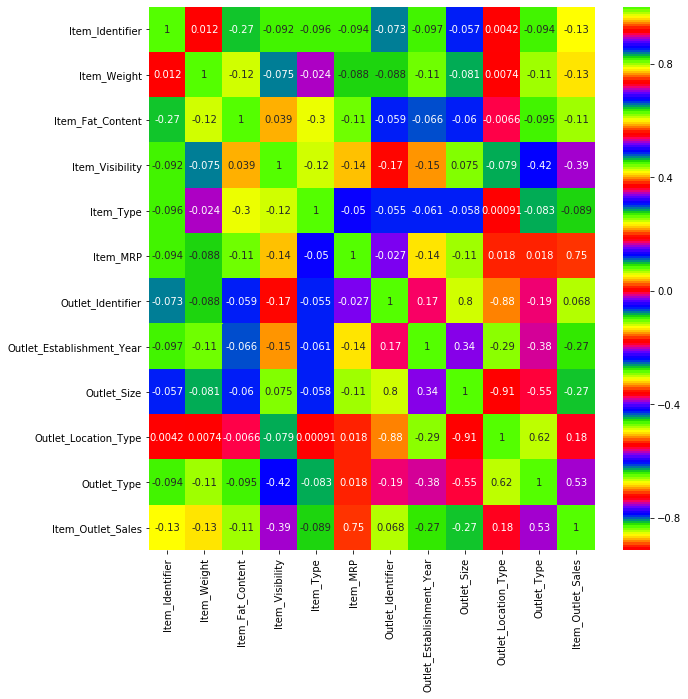

In [76]:
corr_mat = encoded_data1.corr()
features = corr_mat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(corr_mat[features].corr(), annot=True, cmap='prism')
plt.show()

As seen from the heatmap our target 'Item_Outlet_Sales' depends mostly on MRP,Outlet Type and Location

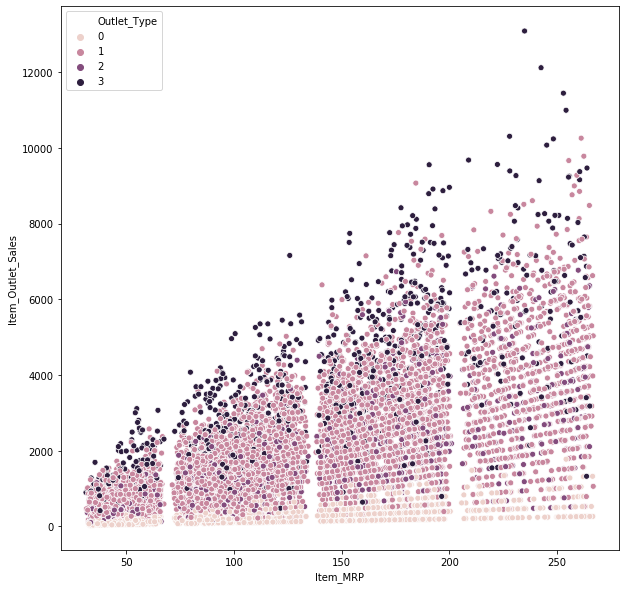

In [77]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data = encoded_data1,hue='Outlet_Type')
plt.show()

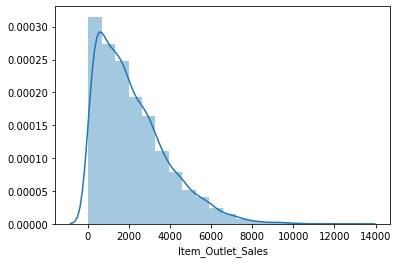

In [78]:
sns.distplot(encoded_data1['Item_Outlet_Sales'],bins=20)
plt.show()

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


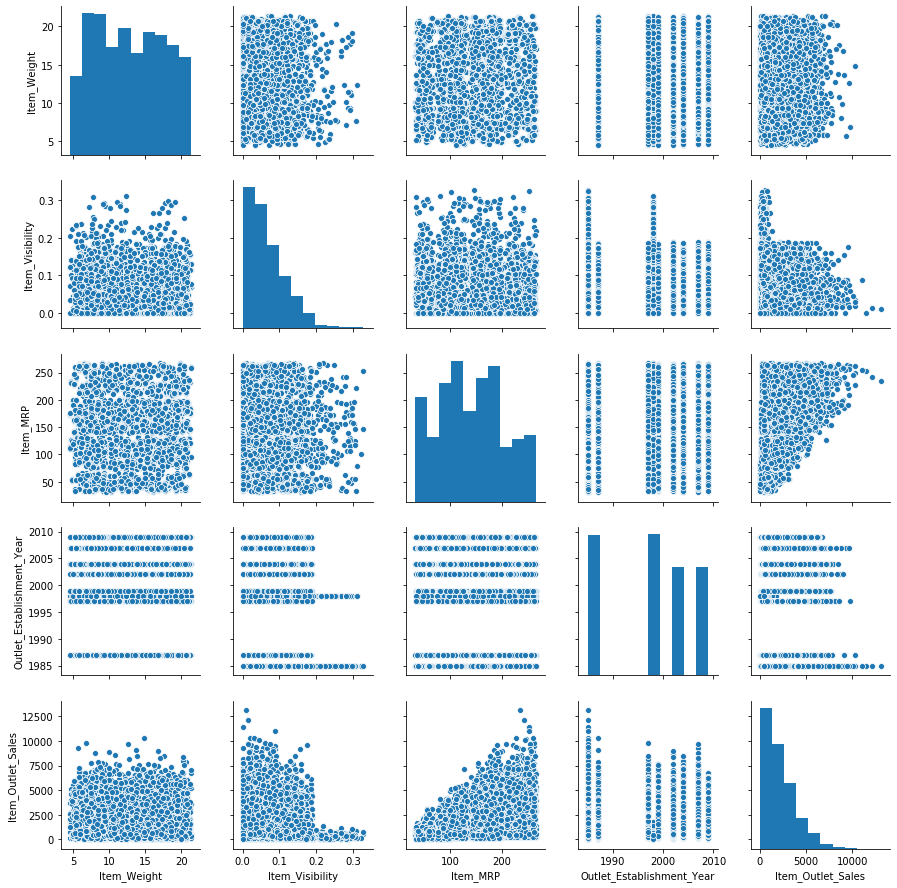

In [79]:
sns.pairplot(bigmart1)
plt.show()

Use Lasso and ElasticNet

**Simple Regression**

In [80]:
x = encoded_data1.iloc[:,5:6].values
x

array([[249.8092],
       [ 48.2692],
       [141.618 ],
       ...,
       [ 85.1224],
       [103.1332],
       [ 75.467 ]])

In [86]:
y = encoded_data1.iloc[:,11].values
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [89]:
model = LinearRegression()
model.fit(x_train,y_train)
model.intercept_

-6.551184781154461

In [90]:
model.coef_

array([15.55104467])

In [91]:
y_predicted = model.predict(x_test)
y_predicted

array([2474.77972364,  997.2842999 , 2009.83770022, ..., 2687.50557393,
        767.90328076, 2373.7787987 ])

In [92]:
sse = metrics.r2_score(y_test,y_predicted)
sse

0.30936976237174674

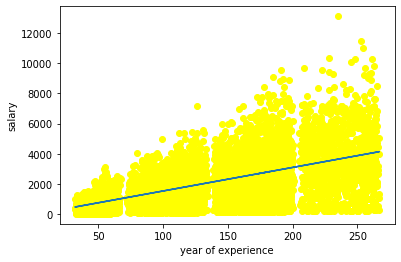

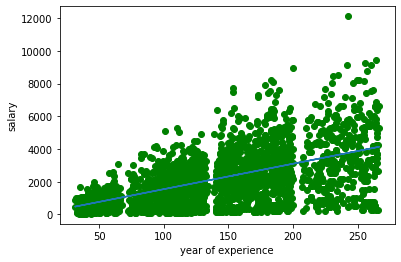

In [93]:
plt.scatter(x_train,y_train,color='yellow')
plt.plot(x_train,model.predict(x_train))
plt.xlabel('year of experience')
plt.ylabel('salary')
plt.show()

plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,model.predict(x_test))
plt.xlabel('year of experience')
plt.ylabel('salary')
plt.show()